# Yianna Bekris 
# RCES Assignment 3 
# 02/27/2024 

# Section 1

In [35]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [179]:
# 1.1. Create two 2D arrays representing coordinates x, y on the cartesian plan
xs = np.linspace(-2, 2, 100)
ys = np.linspace(-2, 2, 100)

x, y = np.meshgrid(xs, ys)

Text(0.5, 1.0, 'y')

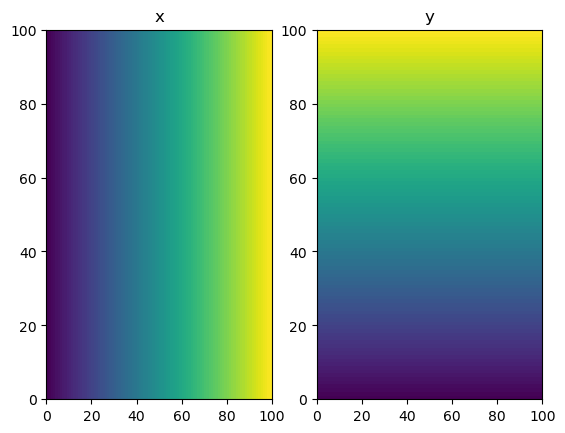

In [180]:
# Visualize each 2D array using pcolormesh
plt.subplot(1,2,1)
plt.pcolormesh(x)
plt.title('x')
plt.subplot(1,2,2)
plt.pcolormesh(y)
plt.title('y')

In [181]:
# 1.3 From your cartesian coordinates, create polar coordinates 
r = np.sqrt(x**2 + y**2)
phi = np.arctan2(y,x)

Text(0.5, 1.0, 'phi')

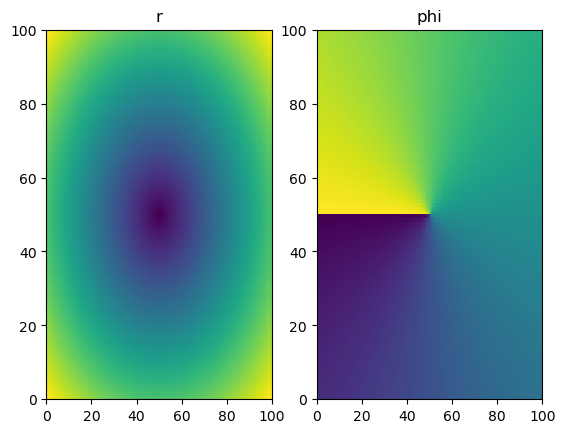

In [182]:
# 1.4. Visualize r and phi on the 2D plane using pcolormesh
plt.subplot(1,2,1)
plt.pcolormesh(r)
plt.title('r')
plt.subplot(1,2,2)
plt.pcolormesh(phi)
plt.title('phi')

Text(0.5, 1.0, 'f')

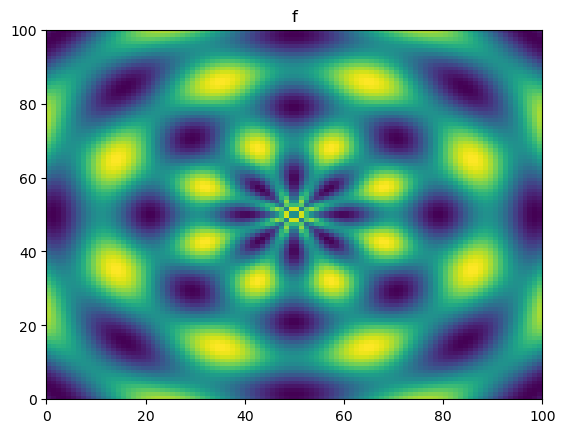

In [183]:
# 1.5 Calculate the quantity f = cos**2(4r) + sin**2(4phi)
f = np.cos(4 * r)**2 + np.sin(4 * phi)**2
plt.pcolormesh(f)
plt.title('f')

Text(0.5, 1.0, 'Mean of f with respect to x')

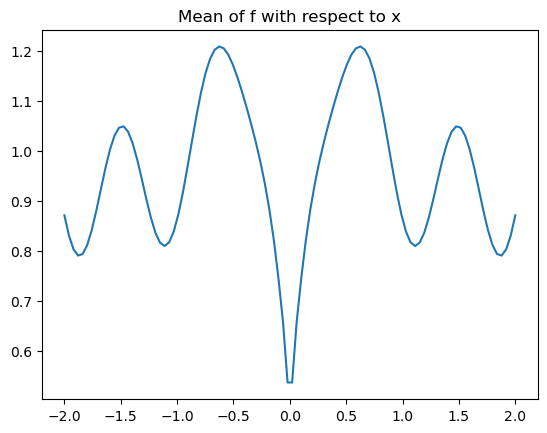

In [185]:
# 1.6 Plot the mean of f with respect to the x axis as a function of y
f_mean_x = np.mean(f, axis=0)
plt.plot(ys, f_mean_x);
plt.title('Mean of f with respect to x')

Text(0.5, 1.0, 'Mean of f with respect to y')

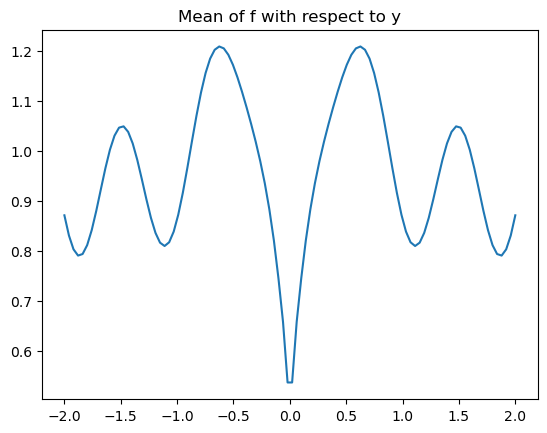

In [186]:
# 1.7 Plot the mean of f with respect to the y axis as a function of x
f_mean_y = np.mean(f, axis=1)
plt.plot(xs, f_mean_y);
plt.title('Mean of f with respect to y')

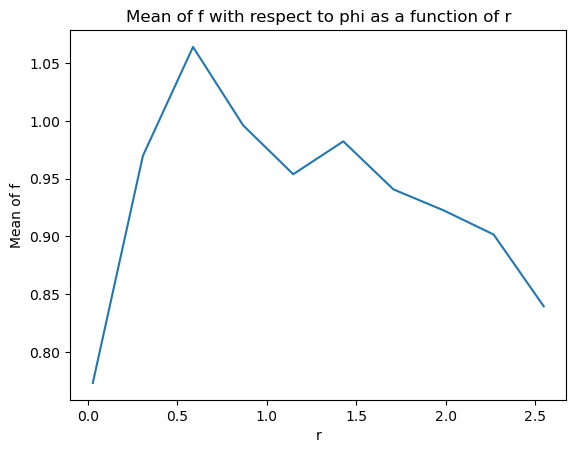

In [202]:
# # 1.8 Plot the mean of f with respect to phi as a function of r
# This is hard. You will need to define a discrete range of r
#  values and then figure out how to average f
#  within the bins defined by your r
#  grid. There are many different ways to accomplish this.
# NOTE: I did this two ways. I was pretty confused by the
# way the question was phrased.

# Create "bin boundaries"
# Needs to be one more than number of bins
bin_bounds = 11

bins = np.linspace(np.min(r), np.max(r), bin_bounds)

## Loop through and calculate f for r values and phi values
## for that r range
f_mean_r = []
for i in range((len(bins)-1)):
    idxs = np.where((r >= bins[i]) & (r <= bins[i+1]))[0]
    new_phi = phi[idxs]
    unique_phi = np.unique(new_phi)
    new_f = np.cos(4 * r[idxs])**2 + np.sin(4 * phi[idxs])**2
    new_f_mean = np.mean(new_f)
    f_mean_r.append(new_f_mean)

plt.plot(bins[0:10], f_mean_r);
plt.xlabel('r')
plt.ylabel('Mean of f')
plt.title('Mean of f with respect to phi as a function of r')
plt.show()

/tmp/ipykernel_292283/3178464713.py:10: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(r_grid, phi_grid, f_grid)


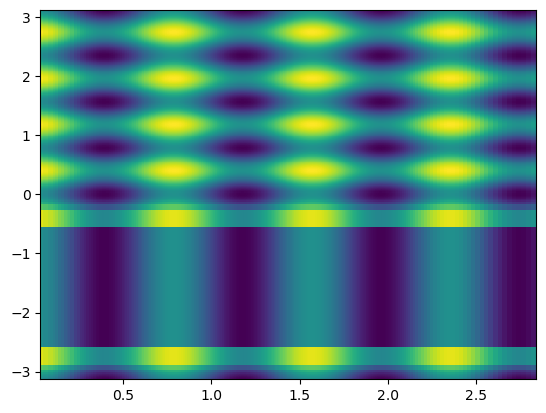

In [163]:
## 1.8 way Phyllis said 
## This way that is commented out is something Phyllis told me Garima said to do
## I think this might be better but I am not sure.

r_grid, phi_grid = np.meshgrid(r, phi)

# Calculate f
f_grid = np.cos(4 * r_grid)**2 + np.sin(4 * phi_grid)**2

plt.pcolormesh(r_grid, phi_grid, f_grid);
plt.title('Mean of f with respect to phi as a function of r')

# Part 2: Analyze ARGO data

In [2]:
import pooch
url = "https://www.ldeo.columbia.edu/~rpa/float_data_4901412.zip"
files = pooch.retrieve(url, processor=pooch.Unzip(), known_hash="2a703c720302c682f1662181d329c9f22f9f10e1539dc2d6082160a469165009")
files

Unzipping contents of '/home/ysb2109/.cache/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip' to '/home/ysb2109/.cache/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip'


['/home/ysb2109/.cache/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/date.npy',
 '/home/ysb2109/.cache/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/T.npy',
 '/home/ysb2109/.cache/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/S.npy',
 '/home/ysb2109/.cache/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/P.npy',
 '/home/ysb2109/.cache/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/levels.npy',
 '/home/ysb2109/.cache/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/lon.npy',
 '/home/ysb2109/.cache/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/lat.npy']

In [4]:
# 2.1 Load each data file as a numpy array
T = np.load('/home/ysb2109/.cache/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/T.npy')
S = np.load('/home/ysb2109/.cache/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/S.npy')
P = np.load('/home/ysb2109/.cache/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/P.npy')
date = np.load('/home/ysb2109/.cache/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/date.npy')
lat = np.load('/home/ysb2109/.cache/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/lat.npy')
lon = np.load('/home/ysb2109/.cache/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/lon.npy')
level = np.load('/home/ysb2109/.cache/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/levels.npy')

In [6]:
# 2.2 Examine the shapes of T, S and P compared to lon, lat, date and level. How do you think they are related?
print(f"T.shape: {T.shape}")
print(f"S.shape: {S.shape}")
print(f"P.shape: {P.shape}")
print(f"lon.shape: {lon.shape}")
print(f"lat.shape: {lat.shape}")
print(f"date.shape: {date.shape}")
print(f"level.shape: {level.shape}")

# I think that there are 78 vertical levels and there are 75 lats and lons. The data from the float is on 
# 78 levels with 75 dates is my guess, while the lat and lon at that index corresponds to the date of each observation.

T.shape: (78, 75)
S.shape: (78, 75)
P.shape: (78, 75)
lon.shape: (75,)
lat.shape: (75,)
date.shape: (75,)
level.shape: (78,)


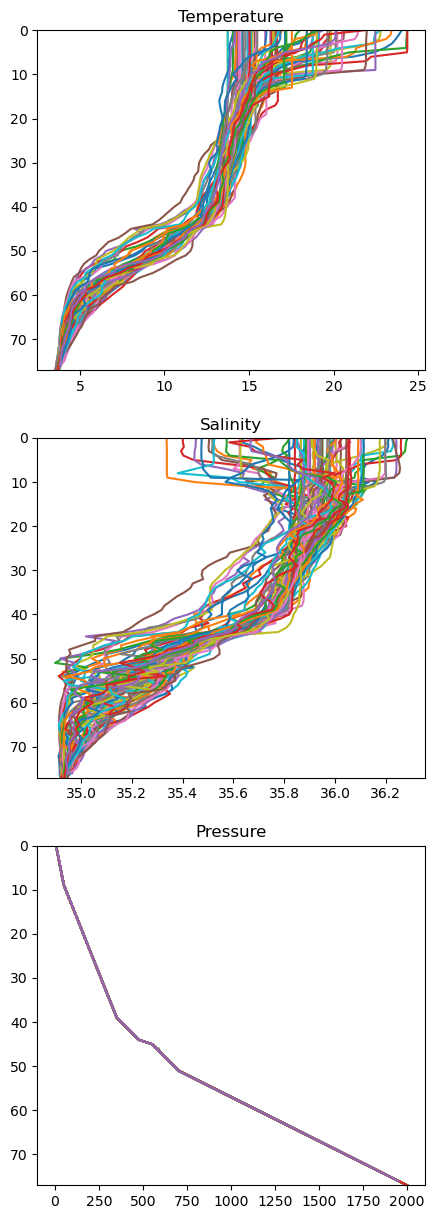

In [174]:
# 2.3 Make a plot for each column of data in T, S and P (three plots)
data_list = [T, S, P]
title_list = ['Temperature', 'Salinity', 'Pressure']

fig = plt.figure(figsize=(5,15))
for i, data in enumerate(data_list):
    plt.subplot(3,1,i+1)
    plt.plot(data, level)
    plt.ylim(np.max(level),np.min(level))
    plt.title(title_list[i])

plt.subplots_adjust(wspace=0.5)


In [108]:
# 2.4 Compute the mean and standard deviation of each of T, S and P at each depth in level.
T_mean = np.mean(T, axis=1)
T_std = np.std(T, axis=1)
S_mean = np.mean(S, axis=1)
S_std = np.std(S, axis=1)
P_mean = np.mean(P, axis=1)
P_std = np.std(P, axis=1)

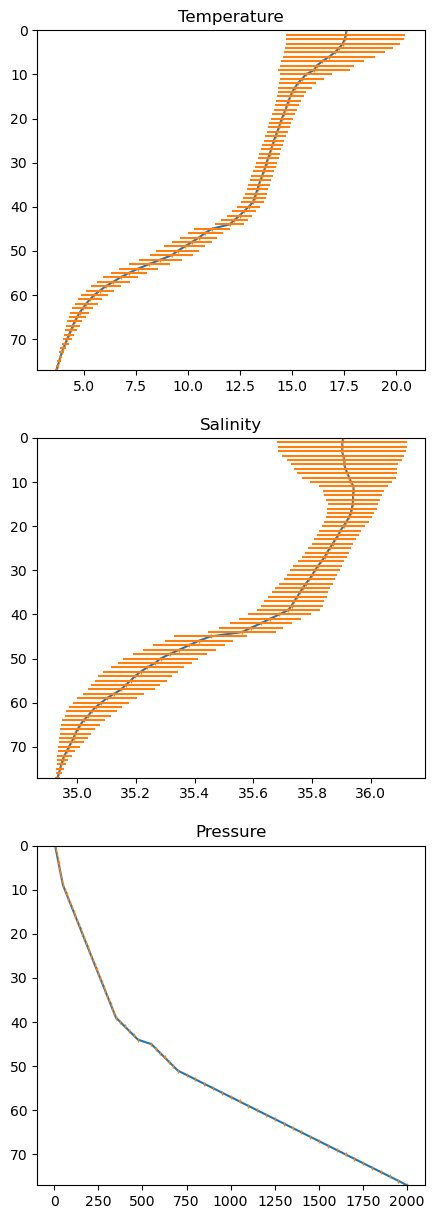

In [175]:
# 2.5 Now make three similar plot, but show only the mean T, S and P at each depth. 
# Show error bars on each plot using the standard deviations.
T_nanmean = np.nanmean(T, axis=1)
T_nanstd = np.nanstd(T, axis=1)
S_nanmean = np.nanmean(S, axis=1)
S_nanstd = np.nanstd(S, axis=1)
P_nanmean = np.nanmean(P, axis=1)
P_nanstd = np.nanstd(P, axis=1)

data_list = [T_nanmean, S_nanmean, P_nanmean]
std_list = [T_nanstd, S_nanstd, P_nanstd]
title_list = ['Temperature', 'Salinity', 'Pressure']

fig = plt.figure(figsize=(5,15))
for i, data in enumerate(data_list):
    error = std_list[i]
    plt.subplot(3,1,i+1)
    plt.plot(data, level)
    plt.ylim(np.max(level),np.min(level))
    plt.errorbar(data, level, xerr=error, fmt='|', markersize=3)
    plt.title(title_list[i])

plt.subplots_adjust(wspace=1)

In [105]:
# 2.6 Account For Missing Data
T_nanmean = np.nanmean(T, axis=1)
T_nanstd = np.nanstd(T, axis=1)
S_nanmean = np.nanmean(S, axis=1)
S_nanstd = np.nanst(S, axis=1)
P_nanmean = np.nanmean(P, axis=1)
P_nanstd = np.std(P, axis=1)

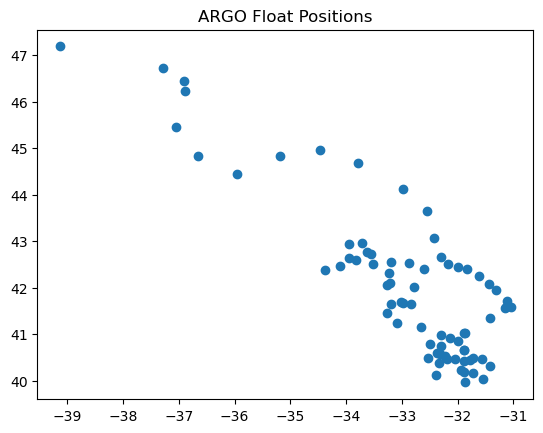

In [106]:
# 2.7 Create a scatter plot of the lon, lat positions of the ARGO float.
plt.scatter(lon, lat);
plt.title('ARGO Float Positions');